## Experiment reporter
* Tool for analysing the experiment results, stored in loggers


In [12]:
import pickle
from detector.reporter import Reporter

workflow = "double"
#Load experiment logs and pass them to the reporter
with open('logs_cesnet_quic_22_xs.pkl', 'rb') as inp:
    logger_drift = pickle.load(inp)
    logger_ref = pickle.load(inp)
try:
    reporter = Reporter([logger_drift,logger_ref], ["Retraining model", "Reference model"], chunk_length=7)
except Exception as e:
    workflow = "single"
    reporter_drift = Reporter([logger_drift], ["Retraining model"], chunk_length=7)
    reporter_ref = Reporter([logger_ref], ["Reference model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [10]:
if workflow == "double":
    reporter.print_experiment_overview()
elif workflow == "single":
    reporter_ref.print_experiment_overview()
    reporter_drift.print_experiment_overview()

2 experiments were performed, each with 21 rounds of detection,
done between 2022-11-07 00:00:00 and 2022-11-27 00:00:00


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Retraining model,1,0.028003,0.004824,0.002198,0.005516,0.721121,0.037023
Reference model,5,0.035044,0.005272,0.011355,0.009301,0.721121,0.037023



The experiments and their tests were defined as follows:
Experiment 0: Retraining model
Retraining model
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Drift analyser test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is high

 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

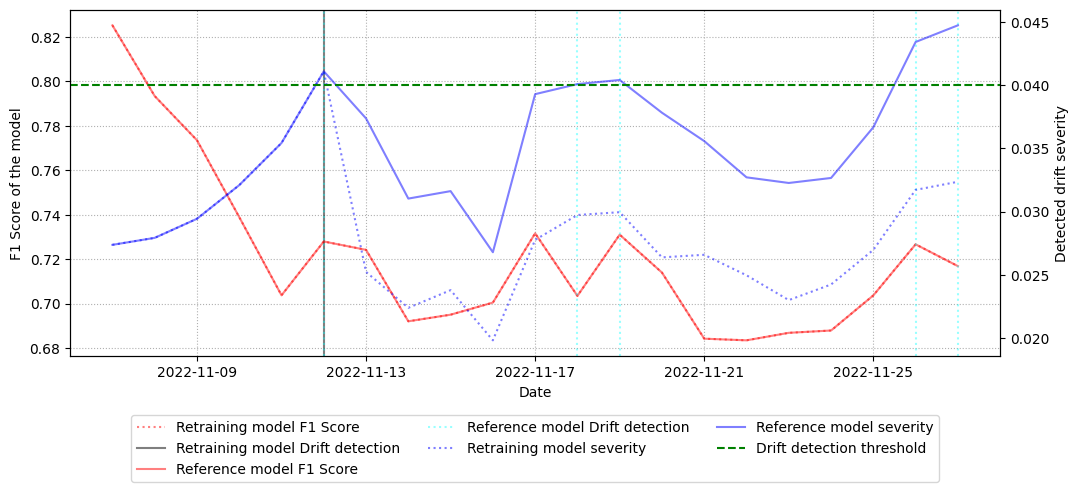

In [13]:
if workflow == "double":
    figure = reporter.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )
elif workflow == "single":
    figure = reporter_ref.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )
    figure = reporter_drift.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

In [15]:
if workflow == "double":
    for r in reporter.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)
elif workflow == "single":
    for r in reporter_ref.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)
    for r in reporter_drift.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
        display(r)

,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
0,0.142857,0.031224,0.005495,0.755243
2,0.000000,0.027109,0.000000,0.698495
1,0.000000,0.025677,0.001099,0.709626


,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
2,0.285714,0.036873,0.012088,0.698495
1,0.285714,0.035299,0.014286,0.709626
0,0.142857,0.032962,0.007692,0.755243


### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Retraining model
59    0.395608
55    0.417956
56    0.419610
62    0.426740
27    0.456918
dtype: float64

Experiment Reference model
59    0.368962
56    0.389776
55    0.403417
62    0.432531
27    0.454771
dtype: float64

 Compare F1 scores between experiments:


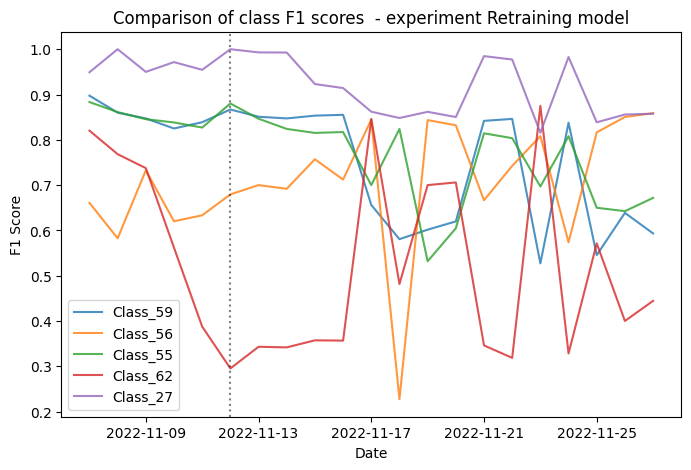

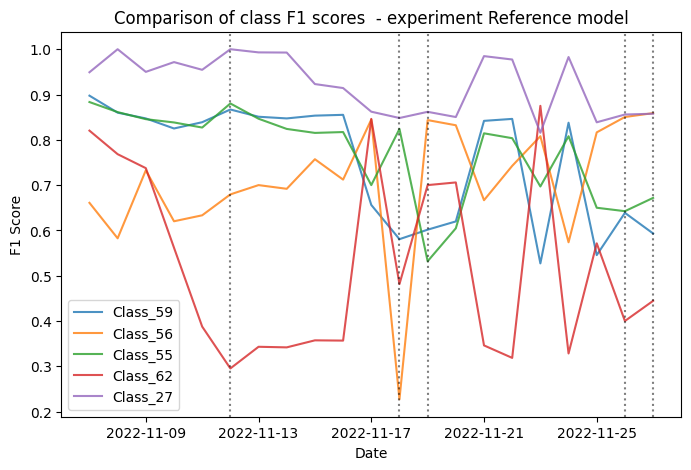

Compare drifts between experiments:


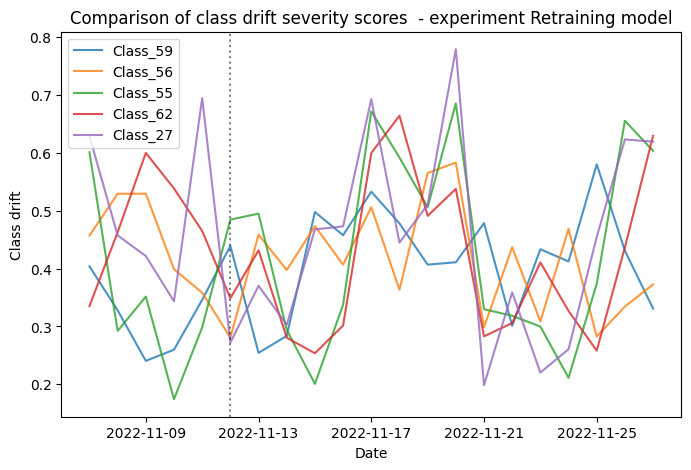

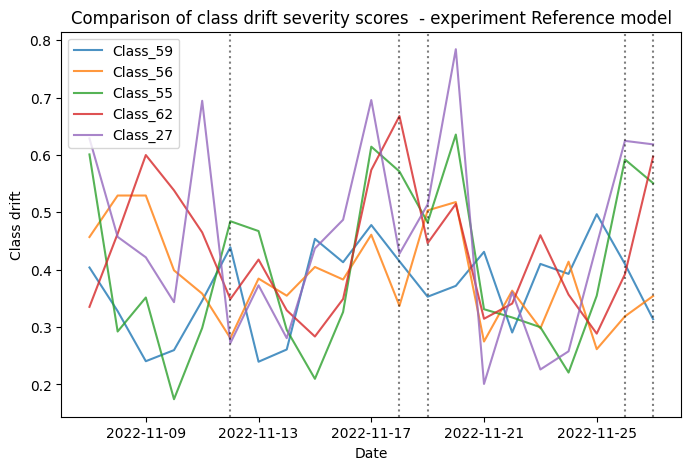

Class pairs with most correlated F1 scores
90  95     0.985282
50  100    0.976577
32  59     0.972011
33  66     0.969809
    50     0.969669
11  19     0.968363
32  66     0.968009
40  66     0.967491
59  66     0.962954
50  59     0.960616
dtype: float64

Class pairs with most correlated drifts
20  69    0.827009
6   91    0.795312
71  88    0.746043
89  94    0.733948
17  66    0.708582
75  80    0.707765
28  82    0.702926
25  88    0.693017
6   14    0.685141
58  71    0.680955
dtype: float64


In [16]:
if workflow == "double":
    reporter.analyse_class_drift(5)
elif workflow == "single":
    reporter_ref.analyse_class_drift(5)
    reporter_drift.analyse_class_drift(5)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Retraining model
SIZE_5            0.068815
SIZE_6            0.059601
PSIZE_BIN4_REV    0.053648
PSIZE_BIN5_REV    0.053043
dtype: float64

Experiment Reference model
SIZE_5            0.087002
PSIZE_BIN4_REV    0.073775
DIR_3             0.071025
SIZE_4            0.065760
dtype: float64

 Compare drifts between experiments:


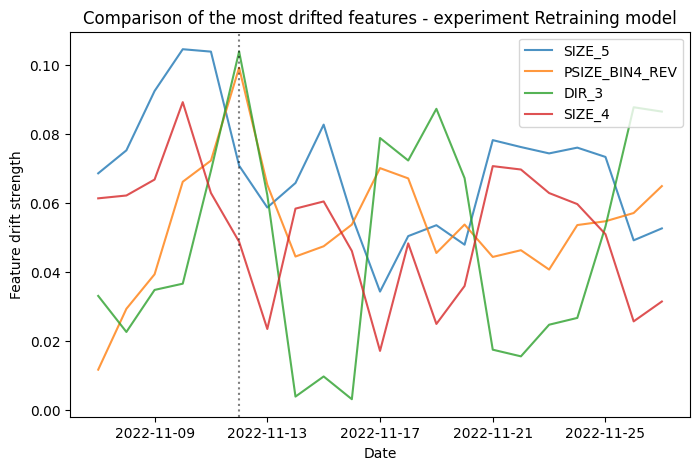

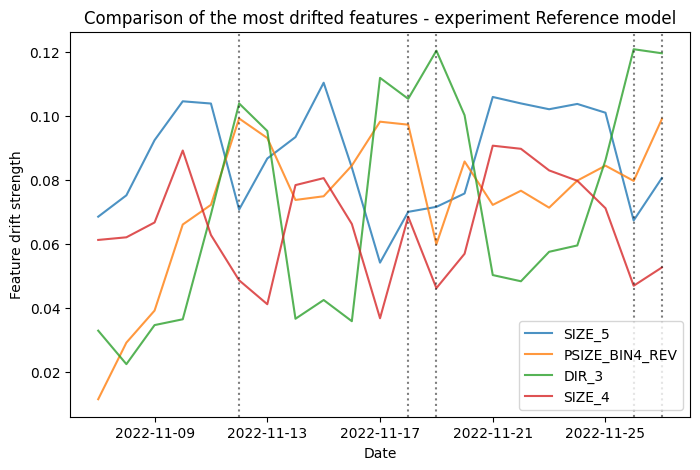

In [17]:
if workflow == "double":
    reporter.analyse_feature_drift(4)
elif workflow == "single":
    reporter_ref.analyse_feature_drift(4)
    reporter_drift.analyse_feature_drift(4)

In [66]:
#reporter.plot_feature_comparison("SIZE_4")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [18]:
drift_logs = logger_drift.get_logs()
ref_logs = logger_ref.get_logs()

In [19]:
#display(ref_logs["description"])
#display(ref_logs["overview"])
#display(ref_logs["test_info"])
#ref_logs["global_drift"]
#ref_logs["class_drift"]
#ref_logs["class_shares"]
#ref_logs["class_f1"]
#ref_logs["feature_drift"]

# Drift Log Analyser

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
# Get indexes of global drifts
drift_index = drift_logs["global_drift"][drift_logs["global_drift"]["is_drifted"] == True ].index

In [23]:
ks_drift_threshold_single = 0.05
ks_drift_threshold_global = 0.475
ws_drift_threshold_single = 0.1
ws_drift_threshold_global = 0.04

def ws_feature_drifted(metric):
    return metric > ws_drift_threshold_single

def ws_sample_drifted(metric):
    return metric > ws_drift_threshold_global

def ks_sample_drifted(metric):
    return metric < ks_drift_threshold_global

def ks_feature_drifted(metric):
    return metric < ks_drift_threshold_single

In [25]:
drift_logs["global_drift"][drift_logs["global_drift"]["is_drifted"] == True ]

,is_drifted,drift_strength,share_drifted_features,Drift_type,f1
2022-11-12,True,0.041114,0.023077,Unknown_drift,0.727917


In [26]:
ref_logs["global_drift"][ref_logs["global_drift"]["is_drifted"] == False ]

,is_drifted,drift_strength,share_drifted_features,Drift_type,f1
2022-11-07,False,0.027362,0.000000,Unknown_drift,0.825186
2022-11-08,False,0.027915,0.000000,Unknown_drift,0.793364
2022-11-09,False,0.029428,0.000000,Unknown_drift,0.773480
2022-11-10,False,0.032094,0.007692,Unknown_drift,0.738891
2022-11-11,False,0.035436,0.007692,Unknown_drift,0.703704
2022-11-13,False,0.037380,0.015385,Unknown_drift,0.724156
2022-11-14,False,0.031028,0.000000,No_drift,0.692012
2022-11-15,False,0.031619,0.007692,No_drift,0.694984
2022-11-16,False,0.026776,0.000000,No_drift,0.700426
2022-11-17,False,0.039306,0.023077,No_drift,0.731593


In [27]:
from pprint import pprint 

def get_top_drifted_class(logger_data):
    tmp_data = logger_data["class_drift"].apply(ks_sample_drifted)
    tmp_max = []
    for c in tmp_data.columns:
        try:
            tmp_max.append({"class":c,"true_drift":tmp_data[c].value_counts()[True]})
        except Exception as e:
            tmp_max.append({"class":c,"true_drift": 0})
    return tmp_max

def get_top_drifted_feature(logger_data):
    tmp_data = logger_data["feature_drift"].apply(ws_feature_drifted)
    tmp_max = []
    for c in tmp_data.columns:
        try:
            tmp_max.append({"feature":c,"true_drift":tmp_data[c].value_counts()[True]})
        except Exception as e:
            tmp_max.append({"feature":c,"true_drift": 0})
    return tmp_max

In [28]:
ks_drift_threshold_single = 0.05
ks_drift_threshold_global = 0.475
ws_drift_threshold_single = 0.1
ws_drift_threshold_global = 0.04

def ws_feature_drifted(metric):
    return metric > ws_drift_threshold_single

def ws_sample_drifted(metric):
    return metric > ws_drift_threshold_global

def ks_sample_drifted(metric):
    return metric < ks_drift_threshold_global

def ks_feature_drifted(metric):
    return metric < ks_drift_threshold_single

In [29]:
# Celkovy pocet driftu
print("=== Drifts number ===")
print("Reference", ref_logs["global_drift"]["is_drifted"].value_counts())
print("Retraining", drift_logs["global_drift"]["is_drifted"].value_counts())
# nejvic N driftujicich trid
print("=== Top 5 drifted classes ===")
print("Reference")
top = get_top_drifted_class(ref_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
print("Retraining")
top = get_top_drifted_class(drift_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
# nejvic N driftujicich featur
print("=== Top 5 drifted features ===")
print("Reference")
top = get_top_drifted_feature(ref_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)
print("Retraining")
top = get_top_drifted_feature(drift_logs)
maxitem = sorted(top, key=lambda x:x["true_drift"],reverse=True)[:5]
pprint(maxitem)


=== Drifts number ===
Reference is_drifted
False    16
True      5
Name: count, dtype: int64
Retraining is_drifted
False    20
True      1
Name: count, dtype: int64
=== Top 5 drifted classes ===
Reference
[{'class': 59, 'true_drift': 19},
 {'class': 56, 'true_drift': 17},
 {'class': 62, 'true_drift': 15},
 {'class': 27, 'true_drift': 13},
 {'class': 55, 'true_drift': 13}]
Retraining
[{'class': 56, 'true_drift': 16},
 {'class': 59, 'true_drift': 16},
 {'class': 27, 'true_drift': 14},
 {'class': 62, 'true_drift': 14},
 {'class': 19, 'true_drift': 12}]
=== Top 5 drifted features ===
Reference
[{'feature': 'DIR_2', 'true_drift': 8},
 {'feature': 'SIZE_2', 'true_drift': 8},
 {'feature': 'SIZE_5', 'true_drift': 8},
 {'feature': 'DIR_3', 'true_drift': 7},
 {'feature': 'BYTES', 'true_drift': 0}]
Retraining
[{'feature': 'SIZE_2', 'true_drift': 2},
 {'feature': 'SIZE_5', 'true_drift': 2},
 {'feature': 'DIR_2', 'true_drift': 1},
 {'feature': 'DIR_3', 'true_drift': 1},
 {'feature': 'BYTES', 'true_